<a href="https://colab.research.google.com/github/spmian/Artificial-Intelligence-Project/blob/main/01_An%C3%A1lisis_Exploratorio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Importar librerias**

In [ ]:
#!pip install geopandas

In [65]:
# Importar librerias requeridad
import os
import geemap
import pandas as pd
import numpy as np


In [66]:
# Gráficos
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline 
sns.set(color_codes=True)

# **2. Cargar Base de Datos**

In [67]:
df = pd.read_csv("train.csv", index_col="id")
df.head(5)

,title,city,postalCode,latitude,longitude,areaSqm,firstSeenAt,lastSeenAt,isRoomActive,rawAvailability,...,living,pets,smokingInside,matchAge,matchGender,matchCapacity,matchLanguages,matchStatus,coverImageUrl,rent
id,,,,,,,,,,,,,,,,,,,,,
0,West-Varkenoordseweg,Rotterdam,3074HN,51.896601,4.514993,14,2019-07-14 11:25:46.511000+00:00,2019-07-26 22:18:23.142000+00:00,True,26-06-'19 - Indefinite period,...,None,No,No,16 years - 99 years,Not important,1 person,Not important,Not important,https://resources.kamernet.nl/image/913b4b03-5...,500
3,Ruiterakker,Assen,9407BG,53.013494,6.561012,16,2019-07-14 11:25:46.988000+00:00,2019-07-18 22:00:31.174000+00:00,False,16-06-'19 - Indefinite period,...,None,No,Yes,18 years - 32 years,Female,1 person,Not important,"Student, Working student",https://resources.kamernet.nl/image/84e95365-6...,290
8,Brusselseweg,Maastricht,6217GX,50.860841,5.671673,16,2019-07-14 11:25:47.814000+00:00,2019-08-10 00:14:27.130000+00:00,True,15-07-'19 - Indefinite period,...,None,No,No,16 years - 40 years,Male,4 persons,Dutch English,Student,https://resources.kamernet.nl/image/6e625591-d...,425
10,Donkerslootstraat,Rotterdam,3074WL,51.893195,4.516478,25,2019-07-14 11:25:48.140000+00:00,2019-07-16 06:05:32.183000+00:00,False,01-08-'19 - Indefinite period,...,None,No,No,21 years - 99 years,Not important,4 persons,Dutch English Spanish French Italian German Po...,"Student, Working student, Working, Looking for...",https://resources.kamernet.nl/image/ea3aea77-0...,600
12,Vorselenburgstraat,Alphen aan den Rijn,2405XJ,52.122335,4.661434,10,2019-07-14 11:25:48.465000+00:00,2019-08-01 00:02:40.516000+00:00,True,08-07-'19 - Indefinite period,...,None,No,Yes,22 years - 40 years,Not important,1 person,Dutch English,"Student, Working student, Working",https://resources.kamernet.nl/image/d0780298-b...,425


In [68]:
df.tail(5)

,title,city,postalCode,latitude,longitude,areaSqm,firstSeenAt,lastSeenAt,isRoomActive,rawAvailability,...,living,pets,smokingInside,matchAge,matchGender,matchCapacity,matchLanguages,matchStatus,coverImageUrl,rent
id,,,,,,,,,,,,,,,,,,,,,
46713,'s-Gravendijkwal,Rotterdam,3021EG,51.915201,4.462803,38,2020-03-03 01:04:41.011000+00:00,2020-03-03 01:04:41.011000+00:00,True,20-03-'20 - Indefinite period,...,None,No,No,18 years - 25 years,Not important,1 person,Dutch,"Student, Working student",https://resources.kamernet.nl/image/433b0e3b-1...,600
46714,Victor Rutgersstraat,Amsterdam,1063GG,52.382689,4.824709,8,2020-03-03 01:04:41.194000+00:00,2020-03-03 01:04:41.194000+00:00,True,01-03-'20 - Indefinite period,...,None,No,No,22 years - 36 years,Not important,1 person,Not important,"Working student, Working, Looking for a job",https://resources.kamernet.nl/image/81c02958-d...,700
46717,Oudedijk,Rotterdam,3061AG,51.928624,4.507187,28,2020-03-03 01:06:47.640000+00:00,2020-03-03 01:06:47.640000+00:00,True,01-03-'20 - Indefinite period,...,Shared,No,No,16 years - 99 years,Not important,> 5 persons,Not important,Not important,https://resources.kamernet.nl/image/198697b0-6...,800
46720,Oudedijk,Rotterdam,3061AG,51.928624,4.507187,35,2020-03-03 01:07:46.072000+00:00,2020-03-03 01:07:46.072000+00:00,True,01-03-'20 - Indefinite period,...,Shared,No,No,16 years - 99 years,Not important,1 person,Not important,"Student, Working student, Working",https://resources.kamernet.nl/image/809ca8b1-c...,1050
46721,Henegouwerlaan,Rotterdam,3014CD,51.921077,4.463528,25,2020-03-03 01:23:57.836000+00:00,2020-03-03 01:23:57.836000+00:00,True,01-05-'20 - Indefinite period,...,Own,No,No,18 years - 99 years,Female,1 person,Not important,"Student, Working student, Working",https://resources.kamernet.nl/image/203d5d86-9...,738


In [69]:
# Dimensiones del dataset
df.shape

(27915, 33)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27915 entries, 0 to 46721
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   title                     27915 non-null  object 
 1   city                      27915 non-null  object 
 2   postalCode                27915 non-null  object 
 3   latitude                  27915 non-null  float64
 4   longitude                 27915 non-null  float64
 5   areaSqm                   27915 non-null  int64  
 6   firstSeenAt               27915 non-null  object 
 7   lastSeenAt                27915 non-null  object 
 8   isRoomActive              27852 non-null  object 
 9   rawAvailability           27915 non-null  object 
 10  postedAgo                 27909 non-null  object 
 11  descriptionNonTranslated  27804 non-null  object 
 12  descriptionTranslated     17775 non-null  object 
 13  rentDetail                20019 non-null  object 
 14  proper

In [71]:
# Comprobación del tipo de datos
df.dtypes

title                        object
city                         object
postalCode                   object
latitude                    float64
longitude                   float64
areaSqm                       int64
firstSeenAt                  object
lastSeenAt                   object
isRoomActive                 object
rawAvailability              object
postedAgo                    object
descriptionNonTranslated     object
descriptionTranslated        object
rentDetail                   object
propertyType                 object
furnish                      object
energyLabel                  object
gender                       object
internet                     object
roommates                    object
shower                       object
toilet                       object
kitchen                      object
living                       object
pets                         object
smokingInside                object
matchAge                     object
matchGender                 

In [72]:
# Análisis Descriptivo
df.describe()

,latitude,longitude,areaSqm,rent
count,27915.000000,27915.000000,27915.000000,27915.000000
mean,52.202204,5.313306,31.667240,669.505212
std,0.516437,0.798895,29.727405,416.156758
min,50.770041,3.546485,6.000000,1.000000
25%,51.925678,4.706450,14.000000,395.000000
50%,52.163189,5.082886,20.000000,550.000000
75%,52.370862,5.892056,40.000000,800.000000
max,53.434608,7.206637,600.000000,5999.000000


In [73]:
# Número de datos ausentes por variable
df.isna().sum().sort_values()

title                           0
coverImageUrl                   0
propertyType                    0
rawAvailability                 0
lastSeenAt                      0
firstSeenAt                     0
rent                            0
longitude                       0
latitude                        0
postalCode                      0
city                            0
areaSqm                         0
postedAgo                       6
matchStatus                    63
matchLanguages                 63
matchCapacity                  63
matchGender                    63
matchAge                       63
smokingInside                  63
pets                           63
living                         63
kitchen                        63
energyLabel                    63
shower                         63
internet                       63
isRoomActive                   63
toilet                         63
descriptionNonTranslated      111
furnish                       214
gender        

# **3. Inspección de la Variable Respuesta**

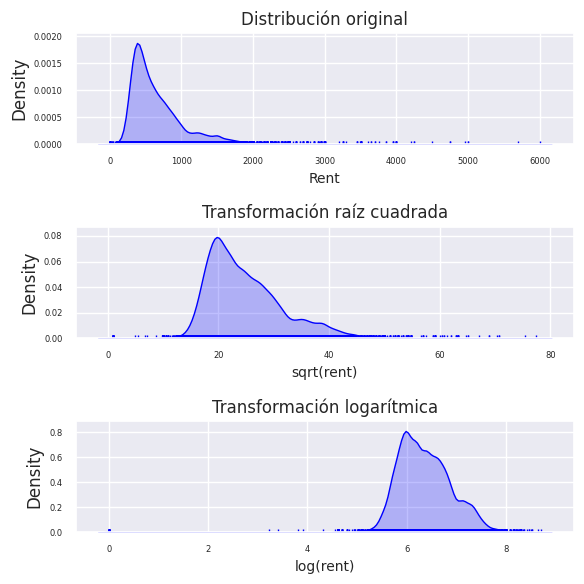

In [74]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6, 6))
sns.kdeplot(
    df.rent,
    fill    = True,
    color   = "blue",
    ax      = axes[0]
)
sns.rugplot(
    df.rent,
    color   = "blue",
    ax      = axes[0]
)
axes[0].set_title("Distribución original", fontsize = 'medium')
axes[0].set_xlabel('Rent', fontsize='small') 
axes[0].tick_params(labelsize = 6)

sns.kdeplot(
    np.sqrt(df.rent,),
    fill    = True,
    color   = "blue",
    ax      = axes[1]
)
sns.rugplot(
    np.sqrt(df.rent,),
    color   = "blue",
    ax      = axes[1]
)
axes[1].set_title("Transformación raíz cuadrada", fontsize = 'medium')
axes[1].set_xlabel('sqrt(rent)', fontsize='small') 
axes[1].tick_params(labelsize = 6)

sns.kdeplot(
    np.log(df.rent,),
    fill    = True,
    color   = "blue",
    ax      = axes[2]
)
sns.rugplot(
    np.log(df.rent,),
    color   = "blue",
    ax      = axes[2]
)
axes[2].set_title("Transformación logarítmica", fontsize = 'medium')
axes[2].set_xlabel('log(rent)', fontsize='small') 
axes[2].tick_params(labelsize = 6)

fig.tight_layout()

In [75]:
# Simetria y Curtosis
print('Asimetria:',df['rent'].skew().round(2), '  Curtosis:', df['rent'].kurt().round(2))

Asimetria: 2.36   Curtosis: 10.36


# **Variables Numéricas**

In [76]:
# Variables numéricas
df.select_dtypes(include=['float64', 'int']).describe()

,latitude,longitude,areaSqm,rent
count,27915.000000,27915.000000,27915.000000,27915.000000
mean,52.202204,5.313306,31.667240,669.505212
std,0.516437,0.798895,29.727405,416.156758
min,50.770041,3.546485,6.000000,1.000000
25%,51.925678,4.706450,14.000000,395.000000
50%,52.163189,5.082886,20.000000,550.000000
75%,52.370862,5.892056,40.000000,800.000000
max,53.434608,7.206637,600.000000,5999.000000


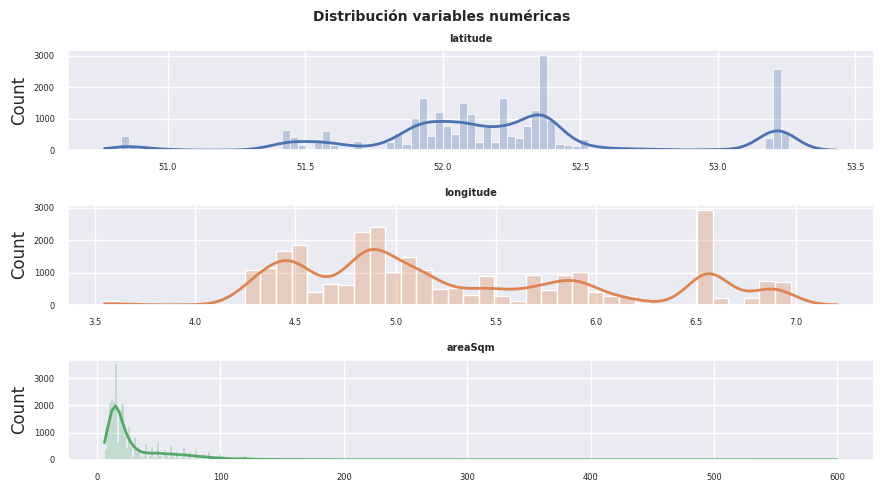

In [77]:
# Gráfico de distribución para cada variable numérica

# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(9, 5))
axes = axes.flat
columnas_numeric = df.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop('rent')

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data     = df,
        x        = colum,
        stat     = "count",
        kde      = True,
        color    = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws = {'linewidth': 2},
        alpha    = 0.3,
        ax       = axes[i]
    )
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

IndexError: ignored

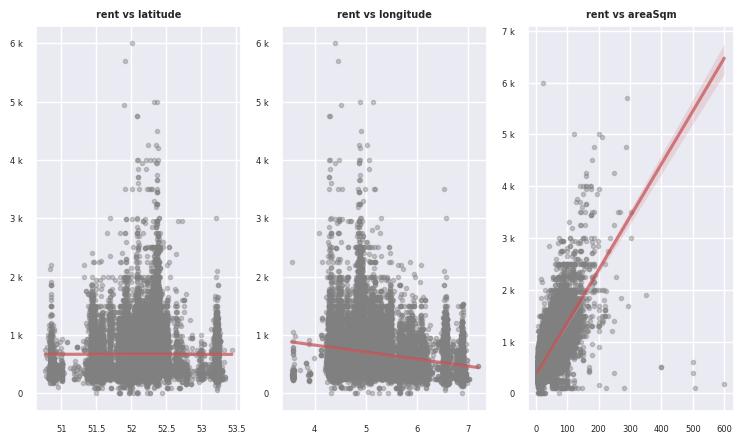

In [78]:
# Gráfico de distribución para cada variable numérica

# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(9, 5))
axes = axes.flat
columnas_numeric = df.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop('rent')

for i, colum in enumerate(columnas_numeric):
    sns.regplot(
        x           = df[colum],
        y           = df['rent'],
        color       = "gray",
        marker      = '.',
        scatter_kws = {"alpha":0.4},
        line_kws    = {"color":"r","alpha":0.7},
        ax          = axes[i]
    )
    axes[i].set_title(f"rent vs {colum}", fontsize = 7, fontweight = "bold")
    axes[i].ticklabel_format(style='sci', scilimits=(-4,4), axis='both')
    axes[i].yaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].xaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Se eliminan los axes vacíos
for i in [3]:
    fig.delaxes(axes[i])
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Correlación con rent', fontsize = 10, fontweight = "bold");

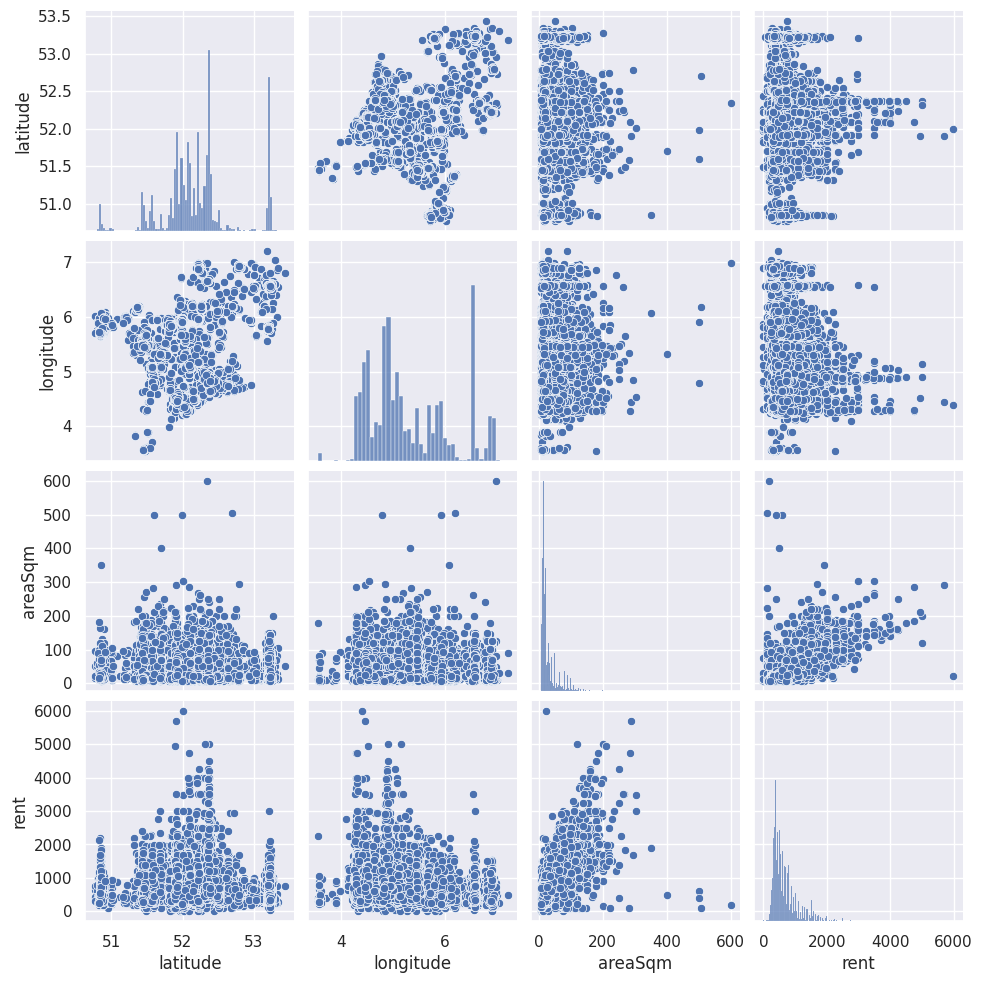

In [79]:
cols = ['latitude', 'longitude', 'areaSqm', 'rent']
#cols = np.unique(list(np.random.permutation(df._get_numeric_data().columns)[:5])+['rent'])
sns.set()
sns.pairplot(df[cols])

<ipython-input-80-a415e0e9dc3d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df.corr()


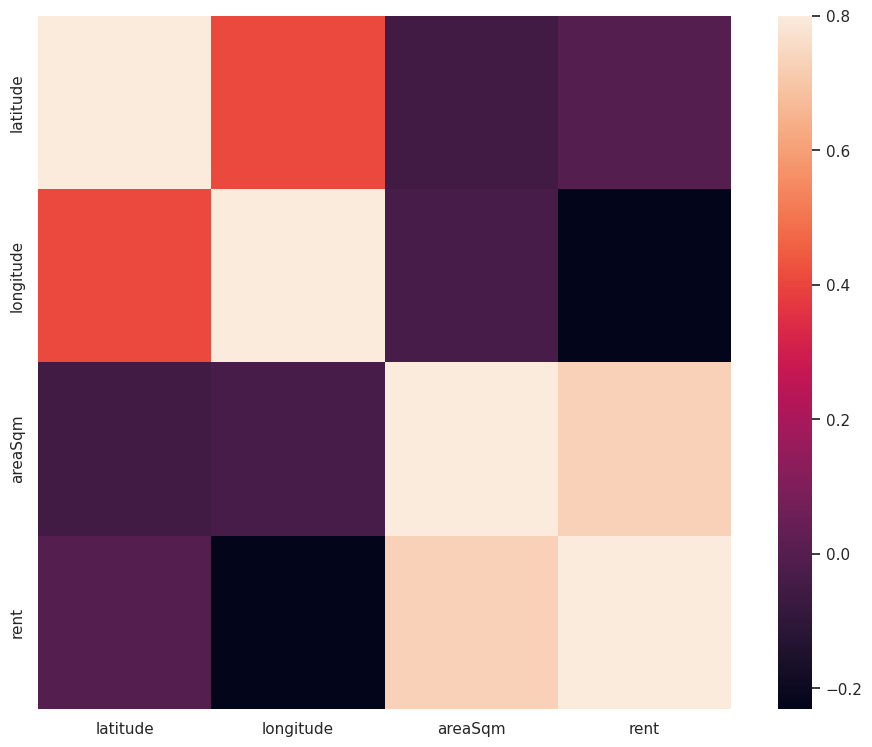

In [80]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [81]:
# Correlación entre columnas numéricas

def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matrix de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)

corr_matrix = df.select_dtypes(include=['float64', 'int']).corr(method='pearson')
tidy_corr_matrix(corr_matrix).head(10)

,variable_1,variable_2,r,abs_r
11,areaSqm,rent,0.729018,0.729018
14,rent,areaSqm,0.729018,0.729018
1,latitude,longitude,0.405798,0.405798
4,longitude,latitude,0.405798,0.405798
7,longitude,rent,-0.230255,0.230255
13,rent,longitude,-0.230255,0.230255
2,latitude,areaSqm,-0.052129,0.052129
8,areaSqm,latitude,-0.052129,0.052129
6,longitude,areaSqm,-0.033980,0.033980
9,areaSqm,longitude,-0.033980,0.033980


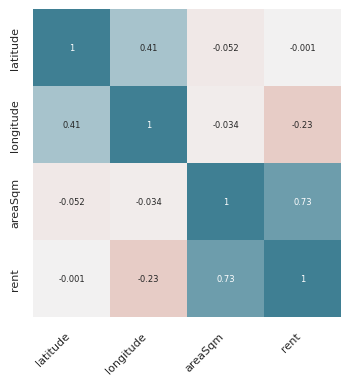

In [82]:
# Heatmap matriz de correlaciones

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 6},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 8)

# **Variables Categoricas**

In [83]:
V_cate = [i for i in df if not i in df._get_numeric_data()]
print (V_cate)

['title', 'city', 'postalCode', 'firstSeenAt', 'lastSeenAt', 'isRoomActive', 'rawAvailability', 'postedAgo', 'descriptionNonTranslated', 'descriptionTranslated', 'rentDetail', 'propertyType', 'furnish', 'energyLabel', 'gender', 'internet', 'roommates', 'shower', 'toilet', 'kitchen', 'living', 'pets', 'smokingInside', 'matchAge', 'matchGender', 'matchCapacity', 'matchLanguages', 'matchStatus', 'coverImageUrl']


In [84]:
# Variables cualitativas (tipo object)

df.select_dtypes(include=['object']).describe()

,title,city,postalCode,firstSeenAt,lastSeenAt,isRoomActive,rawAvailability,postedAgo,descriptionNonTranslated,descriptionTranslated,...,kitchen,living,pets,smokingInside,matchAge,matchGender,matchCapacity,matchLanguages,matchStatus,coverImageUrl
count,27915,27915,27915,27915,27915,27852,27915,27909,27804,17775,...,27852,27852,27852,27852,27852,27852,27852,27852,27852,27915
unique,7922,542,13938,27915,27915,2,4180,480,24034,14927,...,4,4,3,3,645,4,7,144,16,25707
top,Hoogstraat,Amsterdam,1024SJ,2019-07-14 11:25:46.511000+00:00,2019-07-26 22:18:23.142000+00:00,True,01-02-'20 - Indefinite period,4w,.,.,...,Shared,Shared,No,No,16 years - 99 years,Not important,1 person,Not important,Not important,https://resources.kamernet.nl/Content/images/p...
freq,99,4856,48,1,1,26374,1560,5806,30,28,...,16363,9298,25509,23717,7629,20597,18363,19207,7832,2116


# **Datos Faltantes** 

In [85]:
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum() / df.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
missing_data

,Total,Percent
descriptionTranslated,10140,0.363246
rentDetail,7896,0.282859
roommates,536,0.019201
gender,536,0.019201
furnish,214,0.007666
descriptionNonTranslated,111,0.003976
kitchen,63,0.002257
shower,63,0.002257
internet,63,0.002257
living,63,0.002257


In [86]:
df.columns

Index(['title', 'city', 'postalCode', 'latitude', 'longitude', 'areaSqm',
       'firstSeenAt', 'lastSeenAt', 'isRoomActive', 'rawAvailability',
       'postedAgo', 'descriptionNonTranslated', 'descriptionTranslated',
       'rentDetail', 'propertyType', 'furnish', 'energyLabel', 'gender',
       'internet', 'roommates', 'shower', 'toilet', 'kitchen', 'living',
       'pets', 'smokingInside', 'matchAge', 'matchGender', 'matchCapacity',
       'matchLanguages', 'matchStatus', 'coverImageUrl', 'rent'],
      dtype='object')

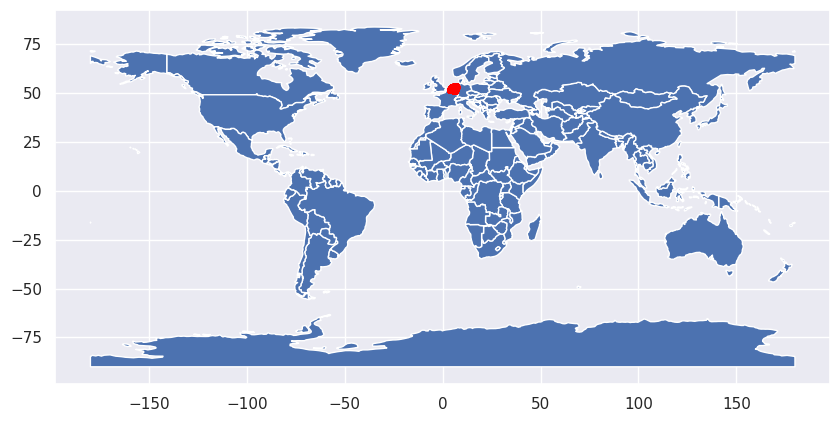

In [87]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
gdf = GeoDataFrame(df, geometry=geometry)   

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);

LAS VARIABLES SELECCIONADAS PARA INCLUIR EN EL PRIMER ACERCAMIENTO A UN MODELO PREDICTIVO, SON:



*   areaSqm
*   rentDetail
*   propertyType
*   furnish
*  gender
*  internet
*  shower
*  toilet
*  kitchen
*  living
*  pets
*  smokingInside

Y como variable de respuesta rent, vamos a clasificar cada valor por el cuartil al que pertenece

A continuacion a cada uno de los features seleccionados se les realizara un ajuste para hacerlos aptos para un modelo incial, los que no se consignen en las celdas de abajo, se consideraron aptos sin ningun tipo de tratamiento.

In [88]:
def data_prep(df):
    df['rentDetail'].replace(np.nan, 'Non Utilities Incl.',inplace=True)
    df['furnish'].replace(np.nan,'Unfurnished',inplace=True)
    df['gender'].replace('Unknown','Mixed',inplace=True)
    df['internet'].replace('Unknown','No',inplace=True)
    for i in ['shower','toilet','living','kitchen']:
        df[i].replace('Unknown','Shared',inplace=True)
    df['smokingInside'].replace('Not Important','Yes',inplace=True)
    try:
        y=pd.qcut(df['rent'], 4, labels=[0,1,2,3], retbins=False, precision=3, duplicates='raise').values
    except :
        y=None
    pre_x=df[['areaSqm','rentDetail','propertyType','furnish','gender','internet','shower','toilet','kitchen','living','pets','smokingInside']]
    x=pd.get_dummies(pre_x,prefix_sep='_',
                columns=['rentDetail','propertyType','furnish','gender','internet','shower','toilet','kitchen','living','pets','smokingInside'], 
                sparse=False, drop_first=True, dtype=None)
    return x,y

In [89]:
X_train,y_train=data_prep(df)
X_test,y_test=data_prep(df2)

NameError: ignored

In [90]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0,max_iter=5000)
lrfitted=lr.fit(X_train, y_train)

In [91]:
pred=lrfitted.predict(X_train)

In [92]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
score='accuracy'
resultado = cross_val_score(lr, X_train, y_train, cv=kfold, scoring=score,error_score='raise')
print('Accuracy for train= ',resultado.mean()*100)

In [ ]:
#[(0.999, 395.0] < (395.0, 550.0] < (550.0, 800.0] < (800.0, 5999.0]]
#       0                 1                2                3